In [ ]:
from google.colab import drive

In [ ]:
def min_max_normalize(arr):
    min_val = min(arr)
    max_val = max(arr)
    normalized_arr = [(x - min_val) / (max_val - min_val) for x in arr]
    return normalized_arr


In [ ]:
my_array = [10]
normalized_array = min_max_normalize(my_array)
print(normalized_array)

[0.0, 0.06451612903225806, 0.9794721407624634, 0.5835777126099707, 1.0]


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
path_prices = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"
path_prices_adjusted = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"
path_fundamentals = "/content/drive/MyDrive/Проект/fundamentals.csv"
path_securities = "/content/drive/MyDrive/Проект/securities.csv"

df_prices = pd.read_csv(path_prices)
df_prices_adjusted = pd.read_csv(path_prices_adjusted)
df_fundamentals = pd.read_csv(path_fundamentals)
df_securities = pd.read_csv(path_securities)

In [ ]:
df_prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df_prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
df_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df_prices["change"] = df_prices["close"] - df_prices['open']

In [ ]:
df_prices['date'] = pd.to_datetime(df_prices['date'])

In [ ]:
df_prices.head()

,date,symbol,open,close,low,high,volume,change
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2.409996
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.259995
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.430000
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.140000
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-2.040001


In [ ]:
df_prices["symbol"].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
pfizer = df_prices[df_prices["symbol"] == "PFE"]

In [ ]:
pfizer

,date,symbol,open,close,low,high,volume,change
583,2010-01-04,PFE,18.270000,18.930000,18.240000,18.940001,52086000.0,0.660000
1051,2010-01-05,PFE,18.920000,18.660000,18.549999,18.930000,43372800.0,-0.260000
1519,2010-01-06,PFE,18.660000,18.600000,18.510000,18.809999,41405100.0,-0.060000
1987,2010-01-07,PFE,18.639999,18.530001,18.459999,18.670000,39428000.0,-0.109998
2455,2010-01-08,PFE,18.620001,18.680000,18.520000,18.709999,30407700.0,0.059999
...,...,...,...,...,...,...,...,...
849119,2016-12-23,PFE,32.410000,32.480000,32.360001,32.560001,10804500.0,0.070000
849619,2016-12-27,PFE,32.570000,32.529999,32.480000,32.720001,11220400.0,-0.040001
850119,2016-12-28,PFE,32.500000,32.349998,32.340000,32.689999,13938800.0,-0.150002
850619,2016-12-29,PFE,32.389999,32.490002,32.369999,32.619999,14067600.0,0.100003


In [ ]:
px.line(pfizer,x="date",y=["open","close"],title="Difference between open and close prices of PFizer stocks")

In [ ]:
px.line(pfizer,x="date",y=["high","low"],title="Difference between high and low prices of PFizer stocks")



---


Bollinger Bands


---



In [ ]:
import warnings
warnings.filterwarnings("ignore")
pfizer['TP'] = (pfizer['close'] + pfizer['low'] + pfizer['high'])/3
pfizer['std'] = pfizer['TP'].rolling(20).std(ddof=0)
pfizer['MA-TP'] = pfizer['TP'].rolling(20).mean()
pfizer['BOLU'] = pfizer['MA-TP'] + 2*pfizer['std']
pfizer['BOLD'] = pfizer['MA-TP'] - 2*pfizer['std']

<Figure size 1440x1440 with 0 Axes>

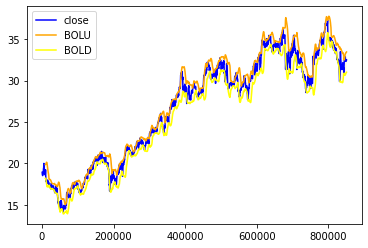

In [ ]:
plt.figure(figsize=(20,20))
ax = pfizer[['close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(pfizer.index, pfizer['BOLD'], pfizer['BOLU'], facecolor='orange', alpha=0.1)
plt.show()
# відносно широкі, не дуже добре



---


What can volume as a feature indicate?

---



In [ ]:
px.line(pfizer,x="date",y=["volume"],title="Volume of stock traded")

In [ ]:
symbols = df_prices["symbol"].unique().tolist()
len(symbols)

501

Exploratory Analysis
What does some of our closing data look like?
Who were the latest top 10 closers?
What do their specs look like over time w.r.t one another?
What is their riskiness comparatively?

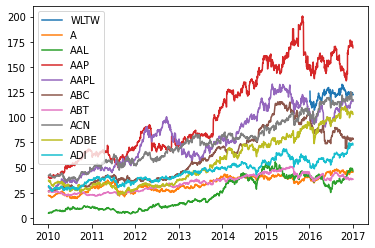

In [ ]:
# Look at some stocks over time
symbols = df_prices["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_prices[(df_prices["symbol"] == u)]["date"]
    values = df_prices[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
plt.legend(symbols, loc='upper left')
plt.show()

In [ ]:
symbols = df_prices["symbol"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_prices[(df_prices["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(),
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_prices["symbol"].tolist()]
df_masked2 = df_prices[top_10_mask]
df_masked2.head()

,date,symbol,open,close,low,high,volume,change
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,-2.350006
300,2010-01-04,AZO,158.990005,158.029999,157.710007,159.389999,408300.0,-0.960006
311,2010-01-04,BIIB,53.970001,53.639999,53.599998,53.970001,2469700.0,-0.330002
342,2010-01-04,CMG,89.599998,87.839996,87.180000,89.599998,313900.0,-1.760002
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,-0.099640


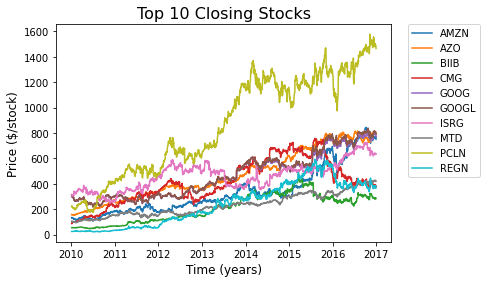

In [ ]:
#Visualize top10 most recent closers
symbols = df_masked2["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_prices["symbol"] == u)]["date"]
    values = df_masked2[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks', fontsize=16)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()



In [ ]:
#Mask by most recent year
latest_year = max(pd.unique(list(df_prices["date"].apply(lambda x:x.year))))
latest_year_mask = [i==latest_year for i in df_prices["date"].apply(lambda x:x.year)]
df_masked1 = df_prices[latest_year_mask]
df_masked1.head()

,date,symbol,open,close,low,high,volume,change
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2.409996
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.259995
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.430000
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.140000
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-2.040001


In [ ]:
#Mask by most top 10 closers
symbols = df_prices["symbol"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_prices[(df_prices["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(),
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_masked1["symbol"].tolist()]
df_masked2 = df_masked1[top_10_mask]
df_masked2.head()

,date,symbol,open,close,low,high,volume,change
725425,2016-01-04,AMZN,656.289978,636.989990,627.510010,657.719971,9314500.0,-19.299988
725441,2016-01-04,AZO,733.000000,735.479980,728.520020,742.229980,299100.0,2.479980
725452,2016-01-04,BIIB,300.339996,294.619995,291.399994,301.019989,2451100.0,-5.720001
725485,2016-01-04,CMG,468.700012,448.809998,447.500000,469.000000,2690300.0,-19.890014
725589,2016-01-04,GOOG,743.000000,741.840027,731.257996,744.059998,3272800.0,-1.159973


In [ ]:
#Mask by most Antitop 10 closers
symbols = df_prices["symbol"].unique().tolist()
minPerSymbol={}
for u in symbols:
    values = df_prices[(df_prices["symbol"] == u)]["close"].tolist()
    minPerSymbol[u] = min(values)

antiTop10Closers = list(dict(sorted(minPerSymbol.items(),
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[10:]).keys())

anti_top_10_mask = [i in antiTop10Closers for i in df_masked1["symbol"].tolist()]
df_masked3 = df_masked1[anti_top_10_mask]
df_masked3.head()

,date,symbol,open,close,low,high,volume,change
725390,2016-01-04,A,41.060001,40.689999,40.340000,41.189999,3287300.0,-0.370002
725391,2016-01-04,AAL,41.290001,40.910000,40.299999,41.349998,12037200.0,-0.380001
725392,2016-01-04,AAP,149.250000,152.240005,147.509995,154.479996,1935300.0,2.990005
725393,2016-01-04,AAPL,102.610001,105.349998,102.000000,105.370003,67649400.0,2.739997
725394,2016-01-04,ABBV,58.060001,57.610001,56.400002,58.320000,10308400.0,-0.450000


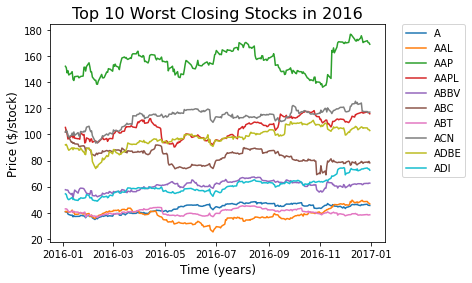

In [ ]:
#Visualize Antitop10 most recent closers
symbols = df_masked3["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked3[(df_prices["symbol"] == u)]["date"]
    values = df_masked3[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Worst Closing Stocks in 2016', fontsize=16)

plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

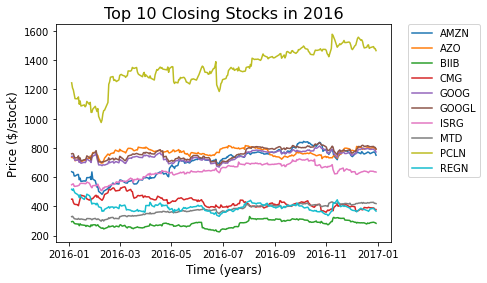

In [ ]:
#Visualize top10 most recent closers
symbols = df_masked2["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_prices["symbol"] == u)]["date"]
    values = df_masked2[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks in 2016', fontsize=16)

plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

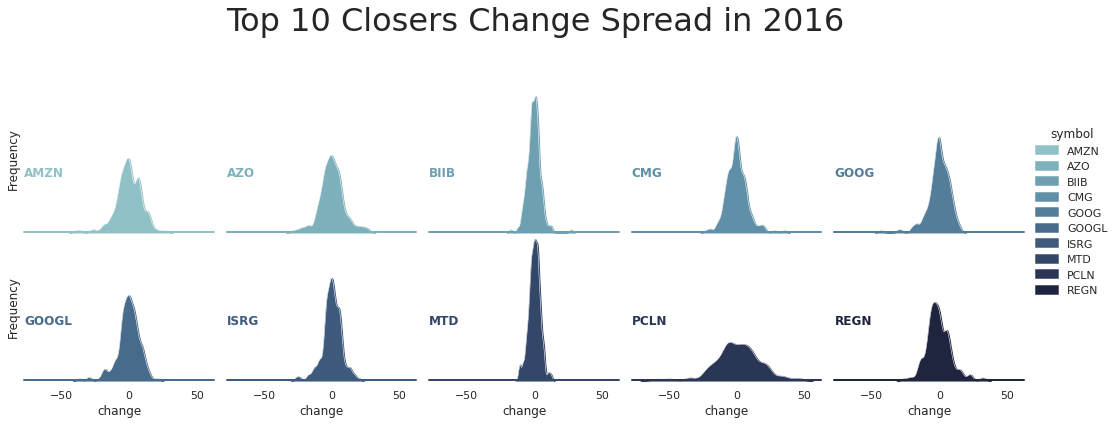

In [ ]:
import seaborn as sns

#Visualize top 10 closers change
def build_density_facetwrap(somedf, colName, valName, wrapAmount, yourTitle):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(somedf,col=colName, hue=colName, col_wrap=wrapAmount, palette=pal)
    # Draw the densities in a few steps
    g.map(sns.kdeplot, valName, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, valName, clip_on=False, color="w", lw=0.5, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .4, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        plt.xlabel('Change ($/day)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    g.map(label, "change")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=0)

    # Remove axes details that don't play will with overlap


    g.set_titles("")
    g.fig.suptitle(yourTitle, fontsize=32)
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(top=.8)
    g.add_legend()

build_density_facetwrap(df_masked2,
                       "symbol",
                        "change",
                        5,
                        "Top 10 Closers Change Spread in 2016"
                       )

['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

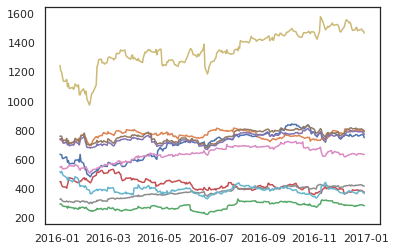

In [ ]:

#Visualize top10 most recent closers
symbols = df_masked2["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_prices["symbol"] == u)]["date"]
    values = df_masked2[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
symbols

In [ ]:
#['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

import warnings
warnings.filterwarnings("ignore")

pfizer = df_prices[df_prices["symbol"] == "AMZN"]

pfizer.describe()

,open,close,low,high,volume,change
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1762.000000
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06,0.023394
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06,5.480495
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05,-49.570007
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06,-2.567505
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06,0.019997
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06,2.775001
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07,26.979981


In [ ]:
#['', '', '', '', '', '', '', '', '', '']


pfizer = df_prices[df_prices["symbol"] == "REGN"]

pfizer.describe()

,open,close,low,high,volume,change
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1762.000000
mean,239.439251,239.396708,235.400239,243.182105,8.818251e+05,-0.042542
std,170.030232,169.871926,167.367700,172.350743,8.113967e+05,5.964460
min,21.059999,20.790001,20.450001,21.799999,1.210000e+04,-38.569977
25%,57.390000,57.477501,56.037499,58.642499,5.415250e+05,-2.257495
50%,249.305000,250.159997,245.264999,253.914993,7.291500e+05,-0.045004
75%,386.440010,386.297501,381.807488,393.375000,9.895000e+05,1.977486
max,593.659973,592.400024,581.380005,605.929993,1.538540e+07,33.070007


<Figure size 1440x1440 with 0 Axes>

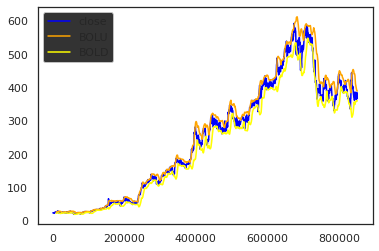

In [ ]:
pfizer['TP'] = (pfizer['close'] + pfizer['low'] + pfizer['high'])/3
pfizer['std'] = pfizer['TP'].rolling(20).std(ddof=0)
pfizer['MA-TP'] = pfizer['TP'].rolling(20).mean()
pfizer['BOLU'] = pfizer['MA-TP'] + 2*pfizer['std']
pfizer['BOLD'] = pfizer['MA-TP'] - 2*pfizer['std']

plt.figure(figsize=(20,20))
ax = pfizer[['close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(pfizer.index, pfizer['BOLD'], pfizer['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

Prepare data


<ipython-input-14-17674065ec68>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates = df_masked2[(df_prices["symbol"] == u)]["date"]
<ipython-input-14-17674065ec68>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = df_masked2[(df_prices["symbol"] == u)]["close"]
<ipython-input-14-17674065ec68>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates = df_masked2[(df_prices["symbol"] == u)]["date"]
<ipython-input-14-17674065ec68>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = df_masked2[(df_prices["symbol"] == u)]["close"]
<ipython-input-14-17674065ec68>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates = df_masked2[(df_prices["symbol"] == u)]["date"]
<ipython-input-14-17674065ec68>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = df_masked2[(df_prices["symbo

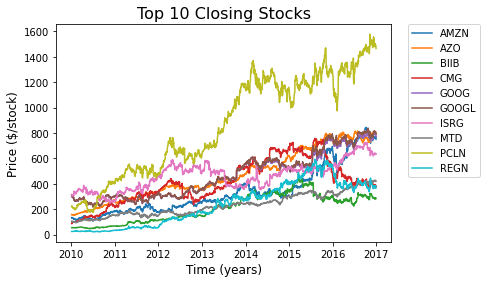

In [ ]:
symbols = df_prices["symbol"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_prices[(df_prices["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(),
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_prices["symbol"].tolist()]
df_masked2 = df_prices[top_10_mask]
df_masked2.head()

#Visualize top10 most recent closers
symbols = df_masked2["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_prices["symbol"] == u)]["date"]
    values = df_masked2[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks', fontsize=16)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

In [ ]:
df_masked2["symbol"].unique().tolist()

['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

In [ ]:
df_masked2

,date,symbol,open,close,low,high,volume,change
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,-2.350006
300,2010-01-04,AZO,158.990005,158.029999,157.710007,159.389999,408300.0,-0.960006
311,2010-01-04,BIIB,53.970001,53.639999,53.599998,53.970001,2469700.0,-0.330002
342,2010-01-04,CMG,89.599998,87.839996,87.180000,89.599998,313900.0,-1.760002
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,-0.099640
...,...,...,...,...,...,...,...,...
850964,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0,-10.760010
851007,2016-12-30,ISRG,638.320007,634.169983,632.250000,638.390015,267300.0,-4.150024
851079,2016-12-30,MTD,421.980011,418.559998,417.029999,423.589996,124200.0,-3.420013
851115,2016-12-30,PCLN,1483.489990,1466.060059,1462.339966,1483.489990,405100.0,-17.429931


In [ ]:
AMZN = df_masked2[(df_masked2["symbol"] == "AMZN")]["change"]
AZO = df_masked2[(df_masked2["symbol"] == "AZO")]["change"]
BIIB = df_masked2[(df_masked2["symbol"] == "BIIB")]["change"]
CMG = df_masked2[(df_masked2["symbol"] == "CMG")]["change"]
GOOG = df_masked2[(df_masked2["symbol"] == "GOOG")]["change"]
GOOGL = df_masked2[(df_masked2["symbol"] == "GOOGL")]["change"]
ISRG = df_masked2[(df_masked2["symbol"] == "ISRG")]["change"]
MTD = df_masked2[(df_masked2["symbol"] == "MTD")]["change"]
PCLN = df_masked2[(df_masked2["symbol"] == "PCLN")]["change"]
REGN = df_masked2[(df_masked2["symbol"] == "REGN")]["change"]

#['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

In [ ]:
import numpy as np
AMZN

284       -2.350006
751        1.260009
1219      -2.350006
1687      -2.009995
2155       2.960006
            ...    
848799    -3.959961
849299     8.000000
849799    -4.119995
850299    -7.250000
850799   -16.599976
Name: change, Length: 1762, dtype: float64

In [ ]:
AMZN_list = AMZN.to_numpy()
AZO_list = AZO.to_numpy()
BIIB_list = BIIB.to_numpy()
CMG_list = CMG.to_numpy()
GOOG_list = GOOG.to_numpy()
GOOGL_list = GOOGL.to_numpy()
ISRG_list = ISRG.to_numpy()
MTD_list = MTD.to_numpy()
PCLN_list = PCLN.to_numpy()
REGN_list = REGN.to_numpy()



#['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

In [ ]:
stonks_dynam = [AMZN_list, AZO_list, BIIB_list, CMG_list, GOOG_list, GOOGL_list, ISRG_list, MTD_list, PCLN_list, REGN_list]

In [ ]:
len(stonks_dynam)

10

In [ ]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]
  name = ['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']
  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Кумулятивна Винагорода")

  ax3 = fig.add_subplot(122)
  ax3.bar(name[0:10], chosen_arms, label="chosen arms")
  ax3.set_title("Обрані Компанії")
#['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

In [ ]:
class Env(object):

  def __init__(self, reward_probas, rewards):
    if len(reward_probas) != len(rewards):
      raise Exception(f"поганий розмір : {len(reward_probas)} не співпадає: {len(rewards)}")

    self.reward_probas = reward_probas
    self.rewards = rewards
    self.k_arms = len(rewards)

  def choose_arm(self, arm,mun):
    if arm < 0 or arm > self.k_arms:
      raise Exception(f"ненульве значення потрібне {self.k_arms -1}")

    return self.rewards[arm][mun] if np.random.random() < self.reward_probas[arm] else 0.0

In [ ]:
environment = Env(reward_probas=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], rewards=stonks_dynam,)
print(f"Reward Probas\t\t: {environment.reward_probas}")
print(f"Rewards \t\t: {environment.rewards}")

Reward Probas		: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Rewards 		: [array([ -2.350006,   1.260009,  -2.350006, ...,  -4.119995,  -7.25    ,
       -16.599976]), array([ -0.960006,  -1.939987,  -1.209992, ...,  -8.329956,   2.859985,
       -10.559998]), array([-0.330002, -1.34    ,  0.330002, ..., -2.73999 , -1.929992,
       -4.210022]), array([-1.760002,  1.5     , -1.269996, ..., -4.230011, -8.960022,
        0.800018]), array([ -0.09964002,  -1.58905284,  -8.76716601, ...,  -8.650024  ,
        -0.540039  , -10.929993  ]), array([ -0.1000976 ,  -1.59658859,  -8.80880781, ...,  -8.76001   ,
         0.549988  , -10.76001   ]), array([ 1.569977, -0.630005,  6.389984, ..., -4.25    ,  1.979981,
       -4.150024]), array([ 0.159996, -1.730003, -0.440003, ..., -8.650024,  0.399994,
       -3.420013]), array([  1.64    ,   2.459992,  -6.039993, ..., -14.270019,   2.950073,
       -17.429931]), array([ 0.389999,  0.569999, -0.310002, ..., -9.130005, -4.690003,
       -8.209992])]


In [ ]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm,i)

      arm_counts[arm] += 1
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
def randTest():
    random_agent = RandomAgent(env=environment, max_iterations=1760)
    ra_history = random_agent.act()
    #print(f"TOTAL REWARD : {sum(ra_history['rewards'])}")
    return sum(ra_history['rewards'])
#print(greedTest())
less1 = 0
more1 = []
less = []
for i in range(1000):
    res = randTest()
    if res > 0:
        more1.append(res)
    else:
        less.append(res)
print('Less: ', less1, 'More: ', len(more1))

Less:  0 More:  570


In [ ]:
max_value = min(less)

In [ ]:
max_value

-759.5262901189974

Кінцева винагорода : -193.57281892899854


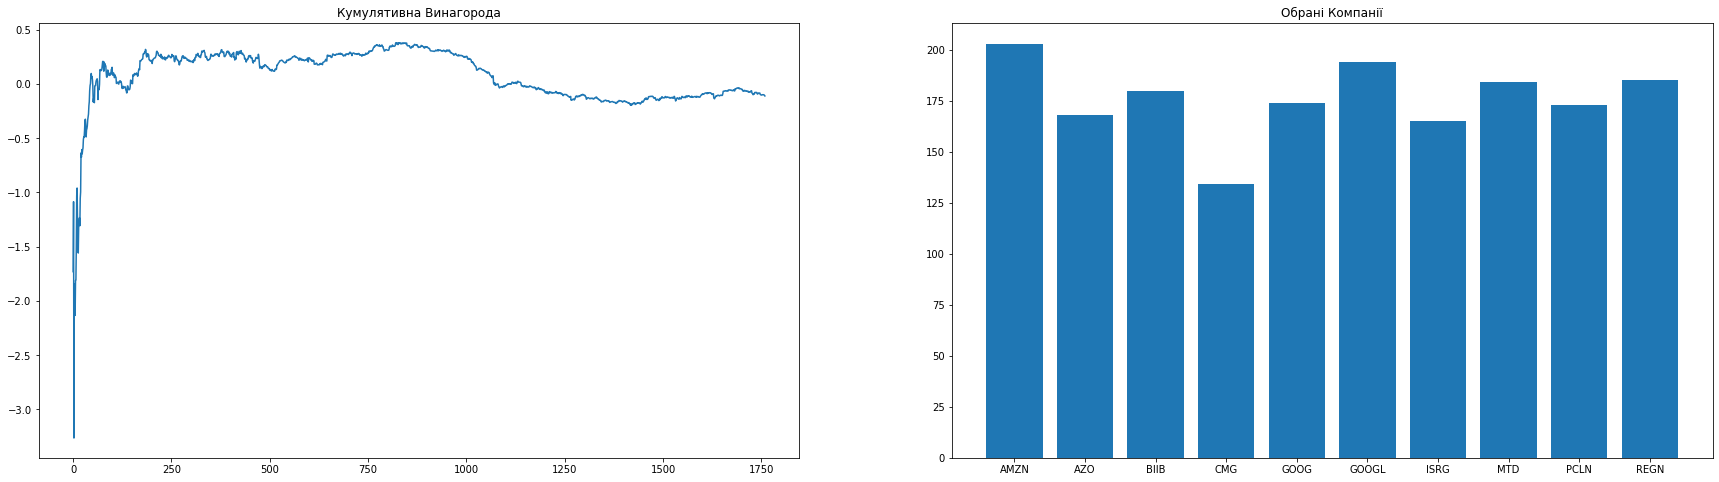

In [ ]:
random_agent = RandomAgent(env=environment, max_iterations=1760)
ra_history = random_agent.act()
plot_history(ra_history)
print(f"Кінцева винагорода : {sum(ra_history['rewards'])}")

In [ ]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=10, epsilon=0, decay=0.001, decay_interval=100):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []
    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)
      #print("rewards",sum(rewards))

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
def greedTest():
    egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=1760, epsilon=0.086)
    eg_history = egreedy_agent.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history['rewards'])
#print(greedTest())
less = 0
more = []
lessarr = []
for i in range(1000):
    res = greedTest()
    if res > 0:
        more.append(res)
    else:
        lessarr.append(res)
print('Less: ', len(lessarr), 'More: ', len(more))
print('Max',max(more))
print('Min',min(lessarr))


Less:  306 More:  694
Max 557.4224262250008
Min -466.9912586609983


In [ ]:
sfdsf = lessarr + more

In [ ]:
mean(sfdsf)

251.1688272530259

Кінцева винагорода : 280.5464463820021


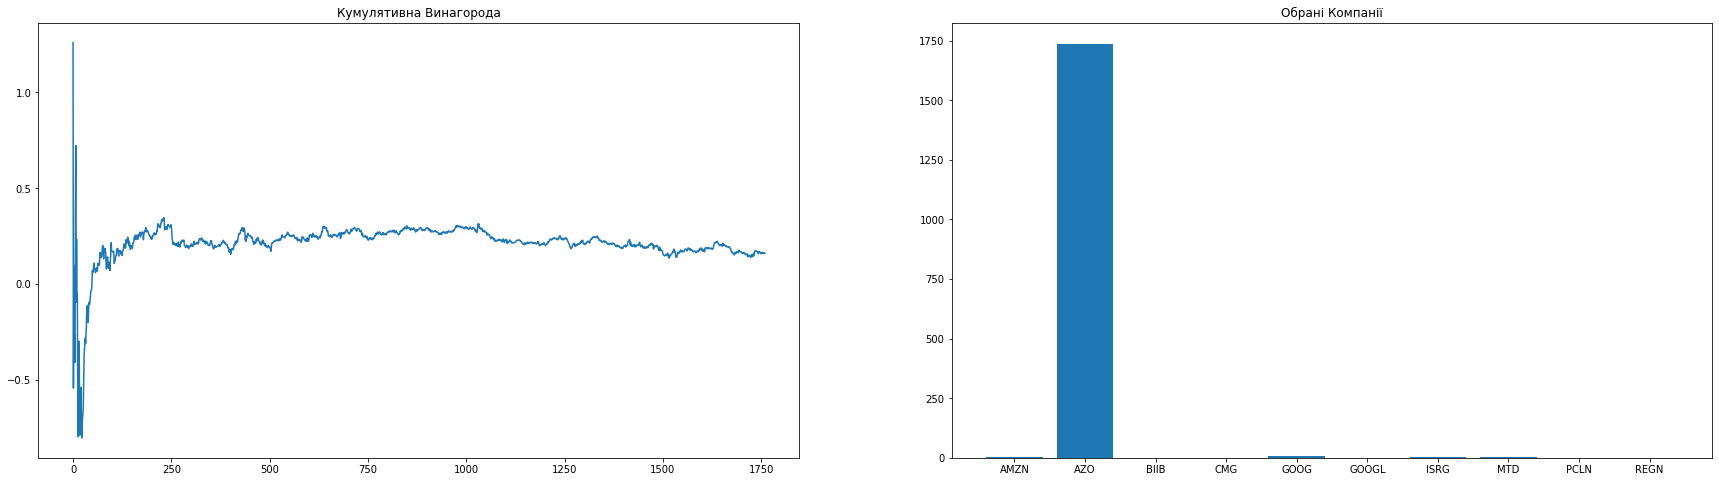

In [ ]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=1760,epsilon=0.01)
eg_history = egreedy_agent.act()
print(f"Кінцева винагорода : {sum(eg_history['rewards'])}")

plot_history(eg_history)

In [ ]:
resuulllltgreed = []
indexxgrid = []
for x in np.arange(0, 1, 0.01):
    egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=1760, epsilon=x)
    eg_history = egreedy_agent.act()
    resuulllltgreed.append(sum(eg_history['rewards']))
    indexxgrid.append(x)

In [ ]:
  from statistics import mean

mean(more)

278.17410167551975

In [ ]:
max(more)

344.84187130700184

In [ ]:
max_value = max(resuulllltgreed)
index = resuulllltgreed.index(max_value)
print(index)

86


In [ ]:
indexxgrid[86]

0.86

Кінцева винагорода : 271.34171058900205


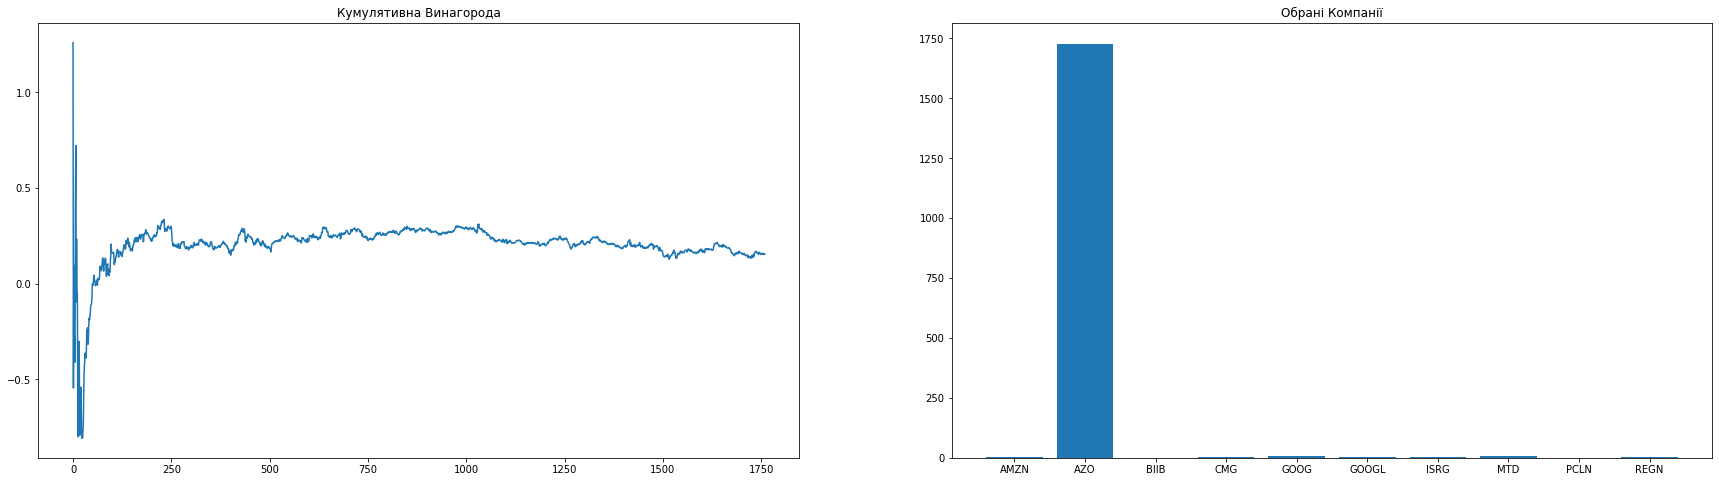

In [ ]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=1760,epsilon=0.086)
eg_history = egreedy_agent.act()
print(f"Кінцева винагорода : {sum(eg_history['rewards'])}")

plot_history(eg_history)

In [ ]:
resuulllltgreed

[280.5464463820021,
 276.5064533820022,
 305.7494340000021,
 278.22643538200214,
 292.47019360800203,
 276.0165083820021,
 273.88384380200205,
 263.61215192699854,
 284.83099749200204,
 -107.5476456999998,
 -22.67560327399542,
 277.62652980700227,
 -169.0448808170004,
 268.05721518800203,
 -96.62424920299966,
 248.7904602650022,
 257.5527196679987,
 237.5546495089984,
 279.1094490000022,
 -48.50776206899994,
 243.17387611300222,
 232.80512324200208,
 -177.77690605000055,
 207.4094970770019,
 247.51008396200206,
 -104.59561130599971,
 238.80117952299884,
 265.7113335020021,
 -114.91686458099974,
 274.10156757900216,
 -176.73549860199995,
 245.685647491002,
 215.09233128400183,
 230.0315425750024,
 -125.39097705499972,
 -243.7663669399965,
 238.9750185220022,
 270.56839950900223,
 279.34874070099863,
 276.50809909700195,
 272.73151321800236,
 261.9584907809987,
 228.34924140000197,
 214.58289410800177,
 262.5064222690019,
 -113.26234410800049,
 -134.37101567199971,
 205.80799638700194,
 

In [ ]:
np.argmax(resuulllltgreed)

86

In [ ]:
indexxgrid[86]

0.86

In [ ]:
class EpsilonGreedyAgentDecay(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay = decay
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
def greedDacayTest():
    egreedy_agent2 = EpsilonGreedyAgentDecay(environment, max_iterations=1760, epsilon=0.01)
    eg_history2 = egreedy_agent2.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history2['rewards'])
#print(greedTest())
less2 = 0
more2 = []
for i in range(1000):
    res = greedDacayTest()
    if res > 0:
        more2.append(res)
    else:
        less2 = less2 + 1
print('Less: ', less2, 'More: ', len(more2))

Less:  56 More:  944


In [ ]:
max(more2)

In [ ]:
def greedDacayTest():
    egreedy_agent2 = EpsilonGreedyAgentDecay(environment, max_iterations=1760, epsilon=0.086)
    eg_history2 = egreedy_agent2.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history2['rewards'])
#print(greedTest())
less2 = []
more2 = []
for i in range(1000):
    res = greedDacayTest()
    if res > 0:
        more2.append(res)
    else:
        less2.append(res)
print('Less: ', len(less2), 'More: ', len(more2))
print('min: ', min(less2), 'max: ', max(more2))

Less:  318 More:  682
min:  -557.0114888699964 max:  427.53503036400355


In [ ]:
def greedDacayTest():
    egreedy_agent2 = EpsilonGreedyAgentDecay(environment, max_iterations=1760, epsilon=0.095)
    eg_history2 = egreedy_agent2.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history2['rewards'])
#print(greedTest())
less2 = []
more2 = []
for i in range(1000):
    res = greedDacayTest()
    if res > 0:
        more2.append(res)
    else:
        less2.append(res)
print('Less: ', len(less2), 'More: ', len(more2))
print('min: ', min(less2), 'max: ', max(more2))

Less:  297 More:  703
min:  -513.0760281759967 max:  385.092621564003


In [ ]:
def greedDacayTest():
    egreedy_agent2 = EpsilonGreedyAgentDecay(environment, max_iterations=1760, epsilon=0.01)
    eg_history2 = egreedy_agent2.act()
    #print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")
    return sum(eg_history2['rewards'])
#print(greedTest())
less2 = []
more2 = []
for i in range(1000):
    res = greedDacayTest()
    if res > 0:
        more2.append(res)
    else:
        less2.append(res)
print('Less: ', len(less2), 'More: ', len(more2))
print('min: ', min(less2), 'max: ', max(more2))

Less:  72 More:  928
min:  -362.36255561799595 max:  344.3664393820019


In [ ]:
summmm = less2 + more2

In [ ]:
mean(summmm)

249.02857223564095

In [ ]:
class OptimisticAgent(object):

  def __init__(self, env, initial_q=10, initial_visits=20, max_iterations=2000):
    self.env = env
    self.initial_q = initial_q
    self.initial_visits = initial_visits
    self.iterations = max_iterations

  def act(self):
    q_values = np.ones(self.env.k_arms) * self.initial_q
    arm_counts = np.ones(self.env.k_arms) * self.initial_visits
    arm_rewards = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations):
      arm = np.argmax(q_values)
      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm] / arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/len(rewards))

    return {"arms" : arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
def opttest():
    optimistic_agent = OptimisticAgent(environment, initial_q=20, initial_visits=130, max_iterations=1760)
    oa_history = optimistic_agent.act()
    #print(f"TOTAL REWARD : {sum(oa_history['rewards'])}")
    return sum(oa_history['rewards'])

less3 = 0
more3 = []
lessarr = []
for i in range(1000):
    res = opttest()
    if res > 0:
        more3.append(res)
    else:
        lessarr.append(res)
print('Less: ', len(lessarr), 'More: ', len(more3))


Less:  0 More:  1000


In [ ]:
min(more3)

284.0425313479986

Кінцева винагорода : 284.0425313479986


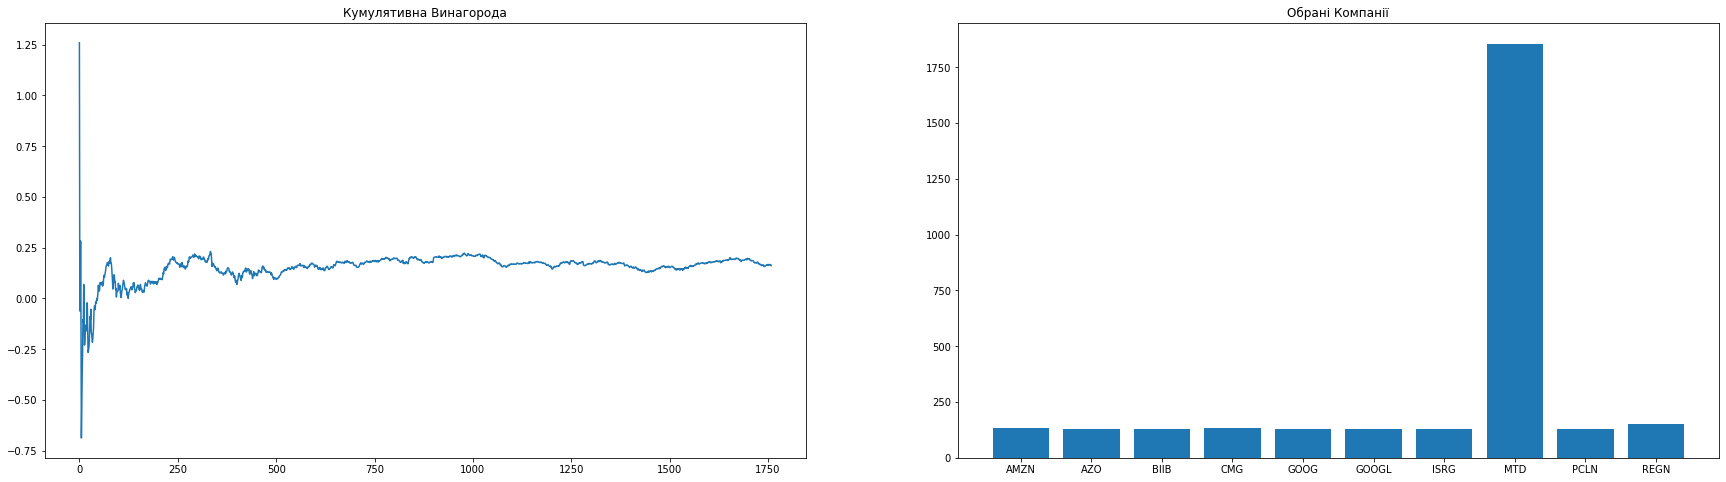

In [ ]:
optimistic_agent = OptimisticAgent(environment, initial_q=20, initial_visits=130, max_iterations=1760)
oa_history = optimistic_agent.act()
print(f"Кінцева винагорода : {sum(oa_history['rewards'])}")
plot_history(oa_history)

In [ ]:
resuulllltopt = []
indexxopt = []
for x in np.arange(0, 400, 1):
    optimistic_agent = OptimisticAgent(environment, initial_q=x, initial_visits=10, max_iterations=1760)
    oa_history = optimistic_agent.act()
    resuulllltopt.append(sum(oa_history['rewards']))
    indexxopt.append(x)
min(resuulllltopt)

-70.01725365199982

In [ ]:
mean(resuulllltopt)

-69.14799436441481

In [ ]:
max_value = mean(resuulllltopt)
index = resuulllltopt.index(max_value)
print(index)

ValueError: ignored

In [ ]:
class UCBAgent(object):

  def __init__(self, env, c=2, max_iterations=438):
    self.env = env
    self.c = c
    self.iterations = max_iterations

  def act(self):
    q_values = np.zeros(self.env.k_arms, dtype=np.float32)
    arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
    arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)

    rewards = []
    cum_rewards = []

    for i in range(0, self.iterations + 1):
      if i < len(q_values):
        arm = i
      else:
        U = self.c * np.sqrt(np.log(i) / arm_counts)
        arm = np.argmax(q_values + U)

      reward = self.env.choose_arm(arm,i)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm] / arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/len(rewards))
      #print(rewards)
    return {"arms" : arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
resuullllt = []
indexx = []
for x in np.arange(0, 100, 0.01):
    ucb_agent = UCBAgent(environment, c=x, max_iterations=1760)
    ucb_history = ucb_agent.act()
    resuullllt.append(sum(ucb_history['rewards']))
    indexx.append(x)

<ipython-input-107-1484f74a0bd3>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arm_counts = np.zeros(self.env.k_arms, dtype=np.int)


In [ ]:
mean(resuullllt)

26.47304700104517

<ipython-input-107-1484f74a0bd3>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arm_counts = np.zeros(self.env.k_arms, dtype=np.int)


Кінцева винагорода : 897.7026800470024


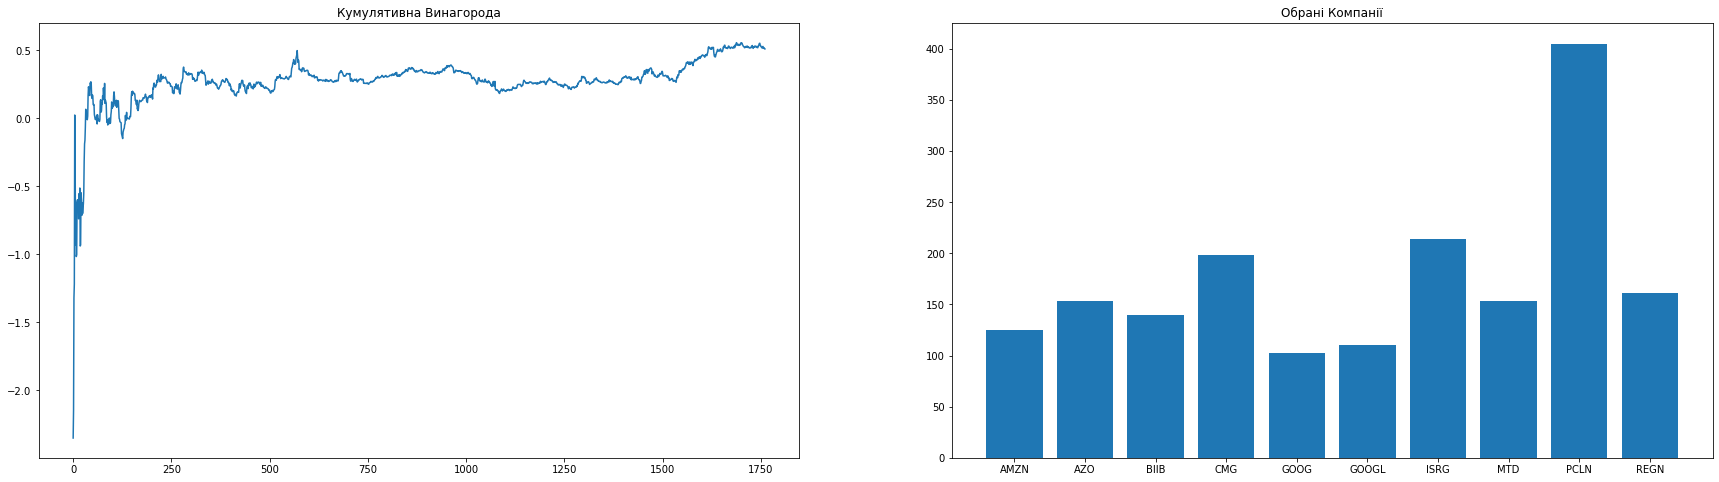

In [ ]:
ucb_agent = UCBAgent(environment, c=17.16, max_iterations=1760)
ucb_history = ucb_agent.act()
print(f"Кінцева винагорода : {sum(ucb_history['rewards'])}")
plot_history(ucb_history)

In [ ]:
np.argmax(resuullllt)

1716

In [ ]:
max(resuullllt)

897.7026800470024

In [ ]:
max_value = max(resuullllt)
index = resuullllt.index(max_value)
print(index)

1716


In [ ]:
def usbest():
    ucb_agent = UCBAgent(environment, c=17.16, max_iterations=1760)
    ucb_history = ucb_agent.act()
    #print(f"TOTAL REWARD : {sum(oa_history['rewards'])}")
    return sum(ucb_history['rewards'])

less4 = 0
more4 = []
lessarr = []
for i in range(1000):
    res = usbest()
    if res > 0:
        more4.append(res)
    else:
        lessarr.append(res)
print('Less: ', len(lessarr), 'More: ', len(more4))

<ipython-input-107-1484f74a0bd3>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arm_counts = np.zeros(self.env.k_arms, dtype=np.int)


Less:  0 More:  1000


In [ ]:
min(more4)

897.7026800470024